# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random
import math

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


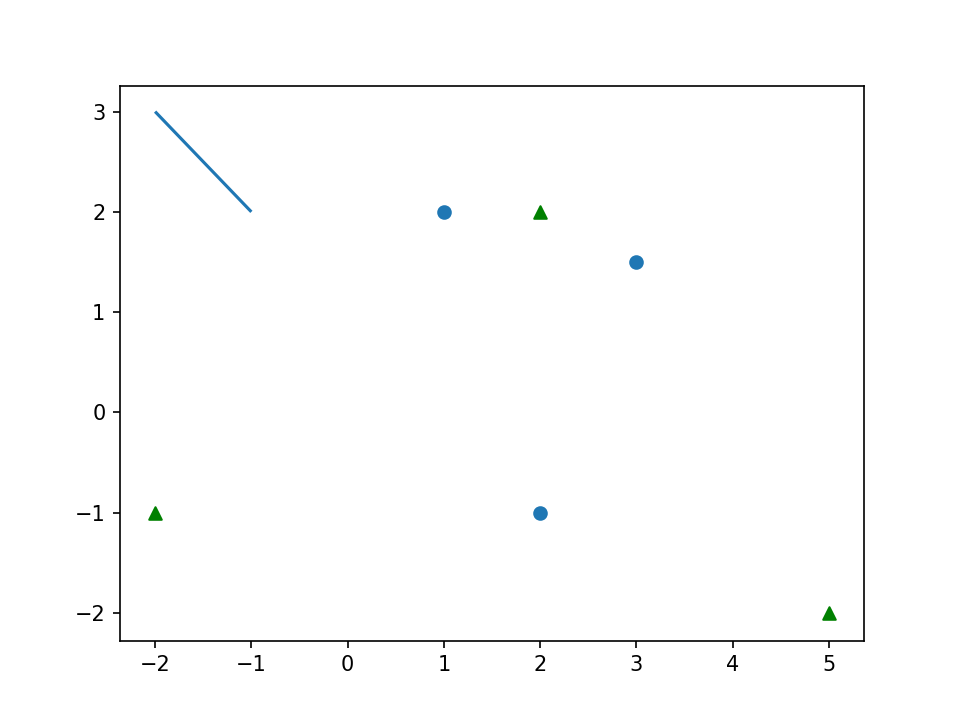

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [4]:
def det_1(a, b, c):
    return a[0] * b[1] + a[1]  * c[0] + b[0] * c[1] -  b[1] * c[0] -  c[1] * a[0] -  a[1] * b[0]



def det_2(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])


def rand_P(n, point_range):
    return [[random.uniform(-point_range, point_range), random.uniform(-point_range, point_range)] for i in range(n)]


def rand_point_cycle(R, t):
    return [R*math.cos((math.pi/2)*t), R*math.sin((math.pi/2)*t)]


def points_cycle(n, R):
    return [rand_point_cycle(R, random.uniform(0,4)) for i in range(n)]


def rand_line(n, point_range, a, b):
    res = []
    for i in range(n):
        x = random.uniform(-point_range, point_range)
        y = (a[1] - b[1]) / (a[0] - b[0]) * x + (a[1] - (a[1] - b[1]) / (a[0] - b[0]) * a[0])
        res.append([x,y])
    return res

a = rand_P(10**5, 1000)
b = rand_P(10**5, 10**14)
c = points_cycle(1000, 100)
d = rand_line(1000, 1000, [-1.0, 0.0], [1.0, 0.1])

<IPython.core.display.Javascript object>


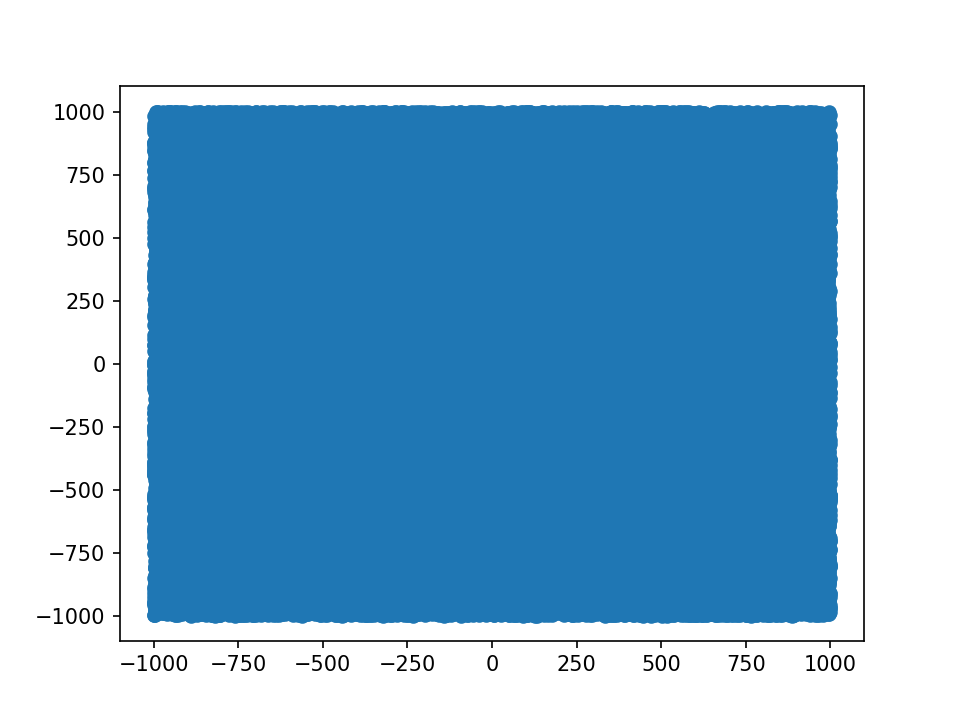

In [5]:
%matplotlib notebook

plot = Plot([PointsCollection(a)])
plot.draw()

<IPython.core.display.Javascript object>


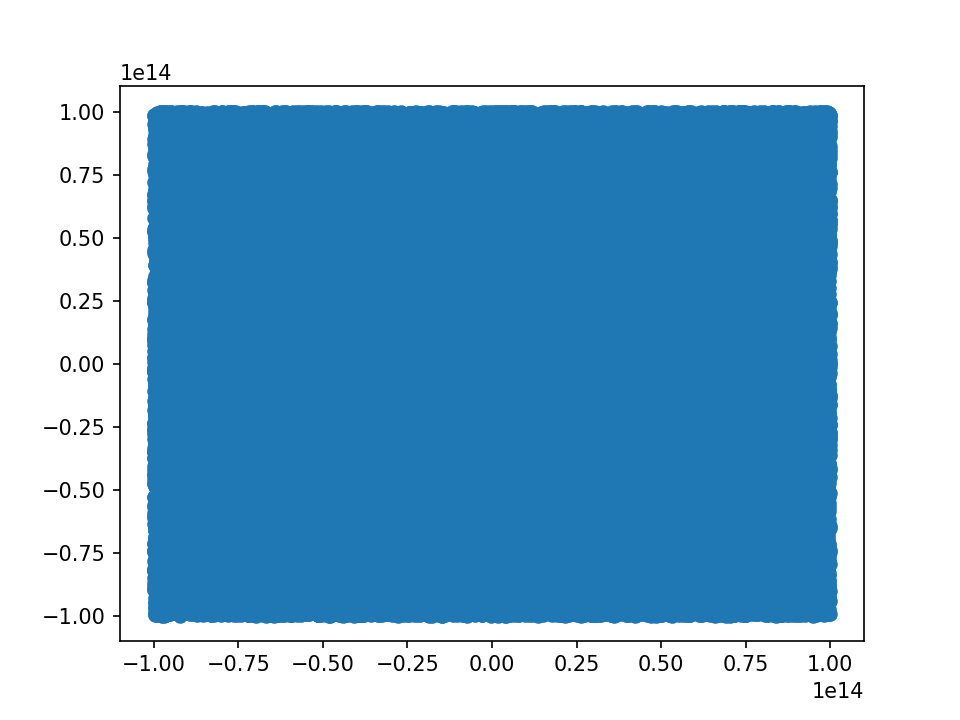

In [6]:
%matplotlib notebook

plot = Plot([PointsCollection(b)])
plot.draw()

<IPython.core.display.Javascript object>


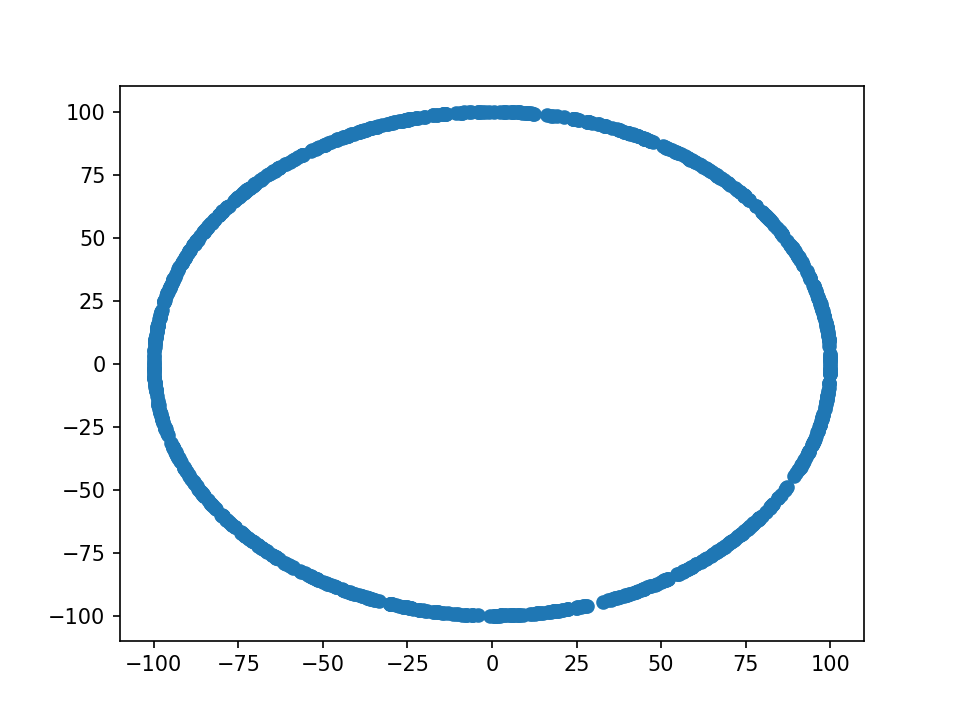

In [7]:
%matplotlib notebook

plot = Plot([PointsCollection(c)])
plot.draw()

<IPython.core.display.Javascript object>


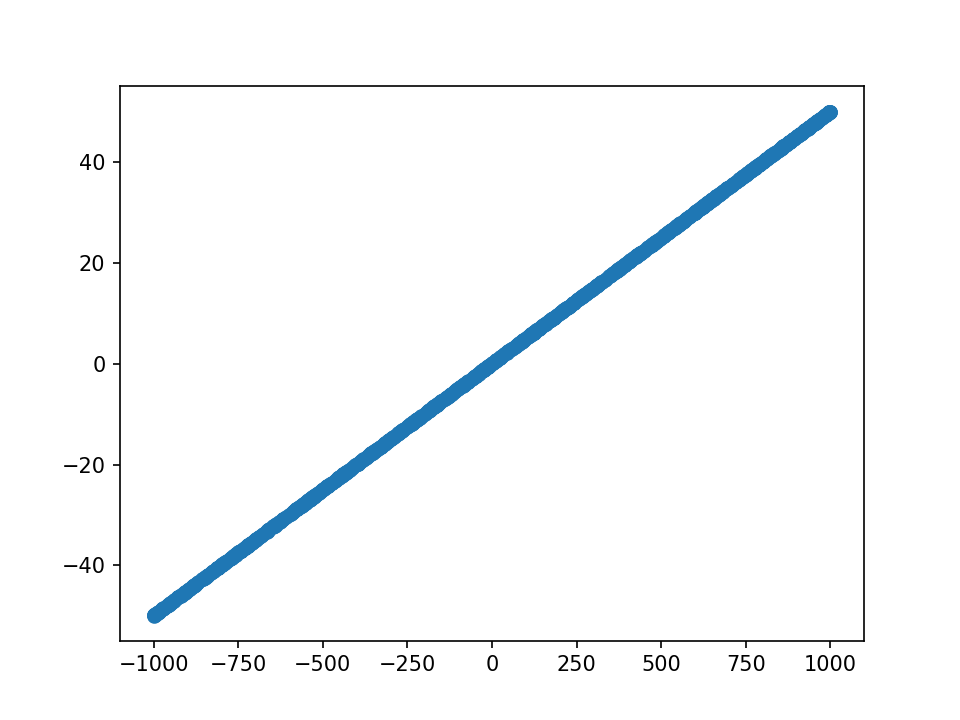

In [8]:
%matplotlib notebook

plot = Plot([PointsCollection(d)])
plot.draw()

In [9]:
def orient(points, det, eps = 10**-15, a=(-1.0,0.0), b=(1.0,0.1)):
    orientation = {
        "left": [],
        "right": [],
        "in_line": []
    }
    for point in points:
        d = det(a, b ,point)
        if d < -eps:
            orientation["left"].append(point)
        elif d > eps:
            orientation["right"].append(point)
        else:
            orientation["in_line"].append(point)
    return orientation

In [10]:
def show(points, det, e=10**-15):
    result = orient(points,det,e)
    Plot([PointsCollection(result['left'], color = 'blue'),
          PointsCollection(result['right'], color = 'red'),
          PointsCollection(result['in_line'], color = 'green')], 
    ).draw()
    print("Left: ",len(result['left']))
    print("Right: ",len(result['right']))
    print("Collinear: ",len(result['in_line']))

<IPython.core.display.Javascript object>


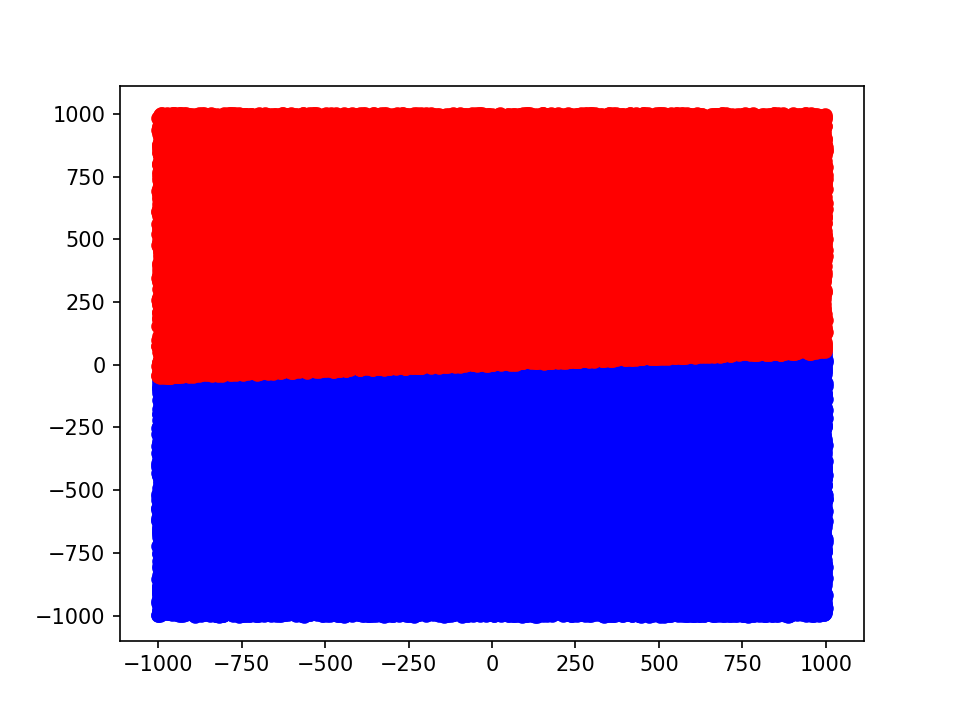

Left:  50016
Right:  49984
Collinear:  0


In [11]:
%matplotlib notebook
show(a,det_1)

<IPython.core.display.Javascript object>


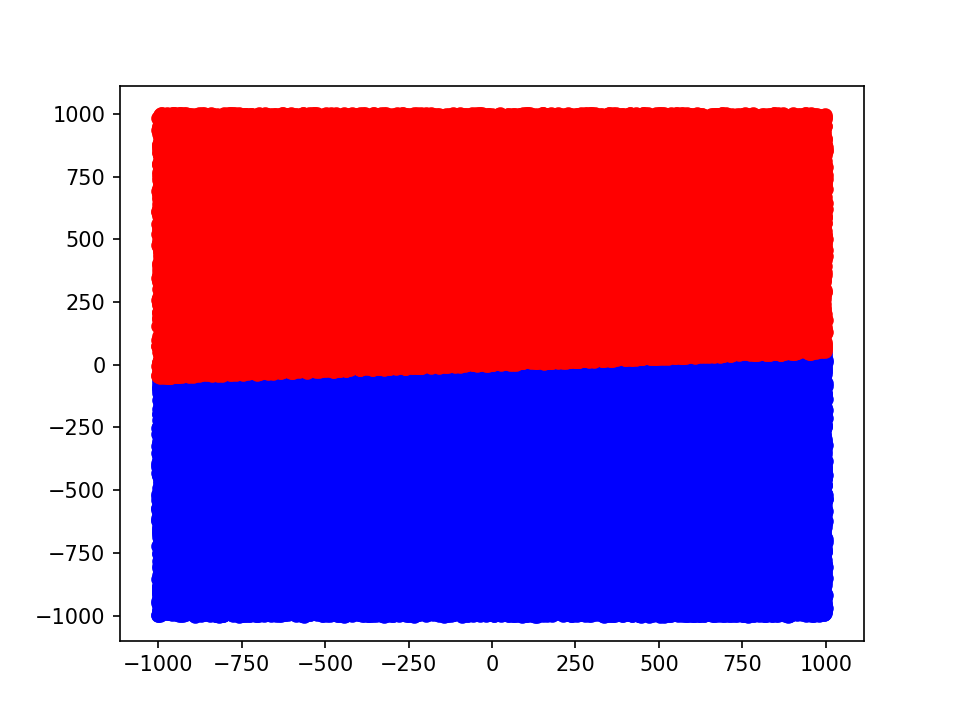

Left:  50016
Right:  49984
Collinear:  0


In [12]:
%matplotlib notebook
show(a,det_2)

<IPython.core.display.Javascript object>


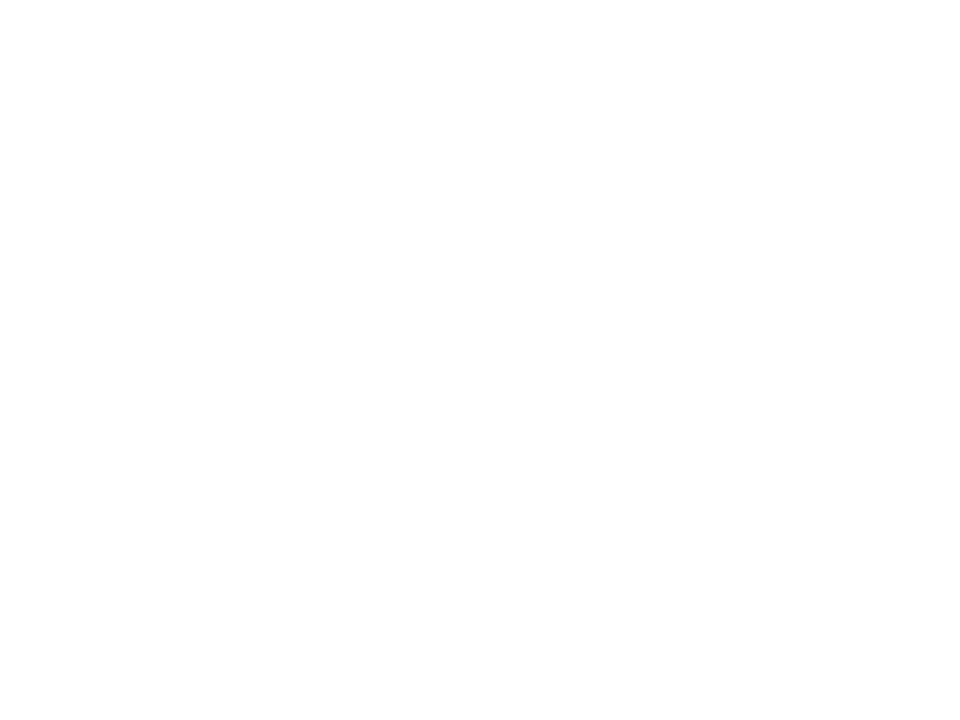

Left:  49718
Right:  50282
Collinear:  0


In [13]:
%matplotlib notebook
show(b,det_1)

<IPython.core.display.Javascript object>


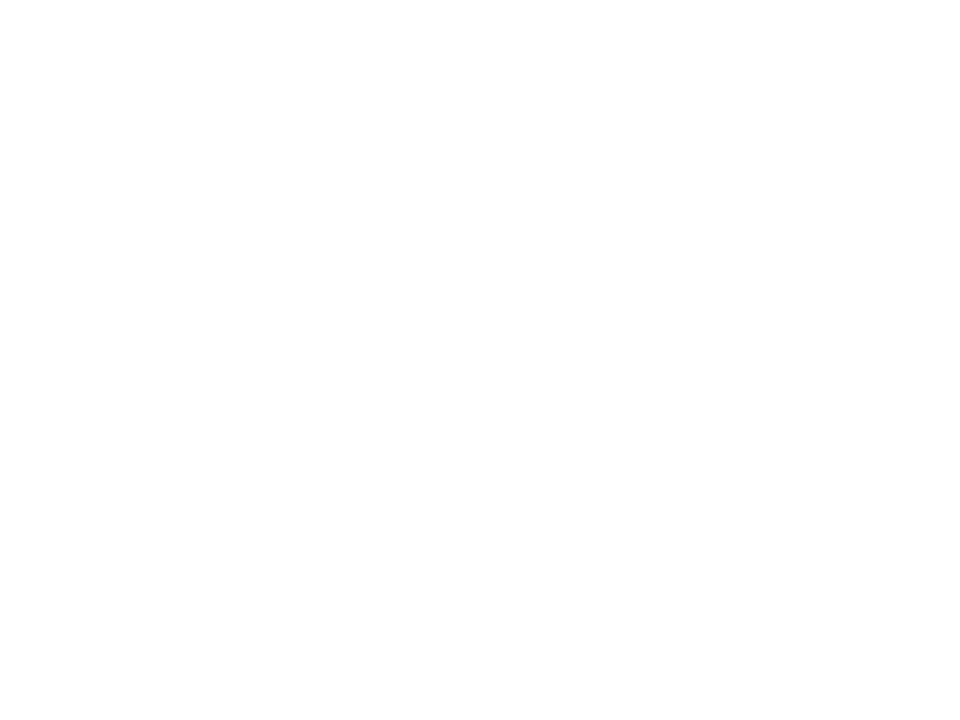

Left:  49714
Right:  50278
Collinear:  8


In [14]:
%matplotlib notebook
show(b,det_2)

<IPython.core.display.Javascript object>


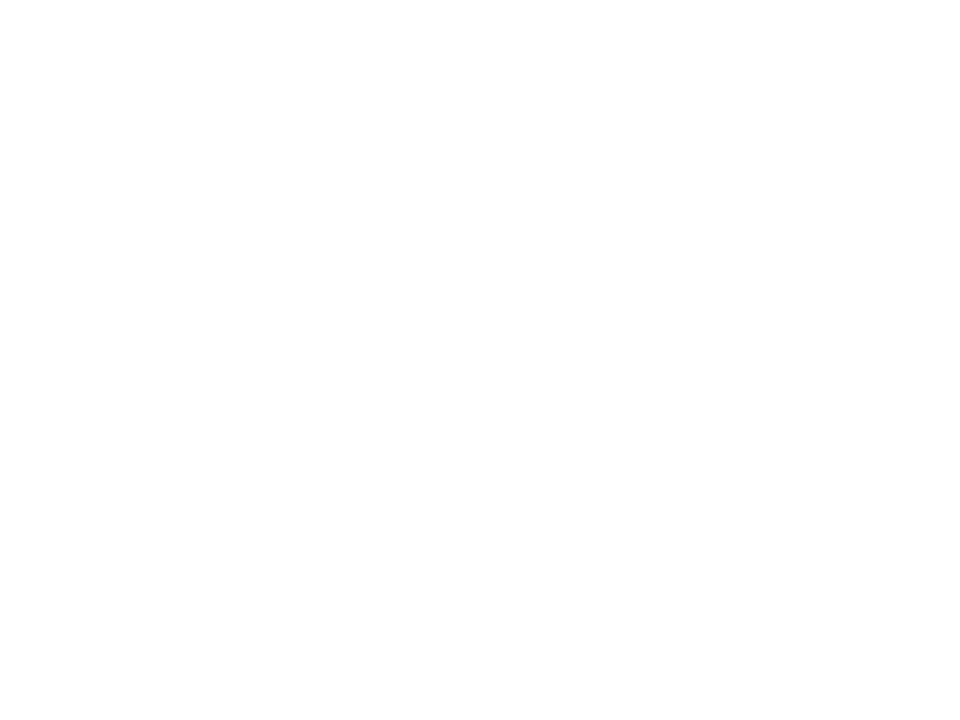

Left:  492
Right:  508
Collinear:  0


In [15]:
%matplotlib notebook
show(c,det_1)

<IPython.core.display.Javascript object>


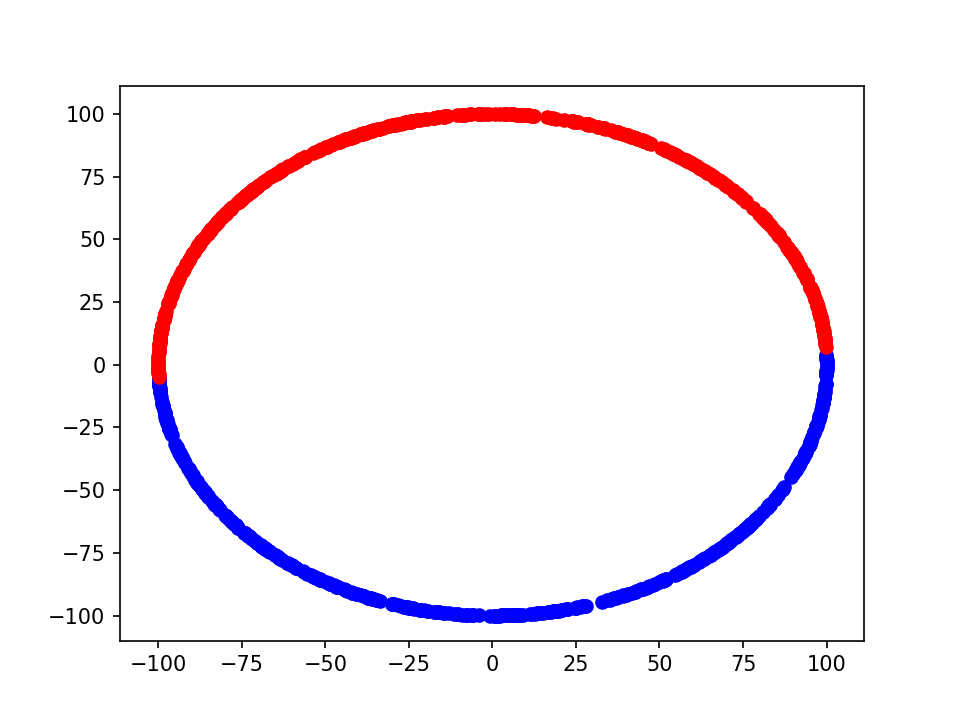

Left:  492
Right:  508
Collinear:  0


In [16]:
%matplotlib notebook
show(c,det_2)

<IPython.core.display.Javascript object>


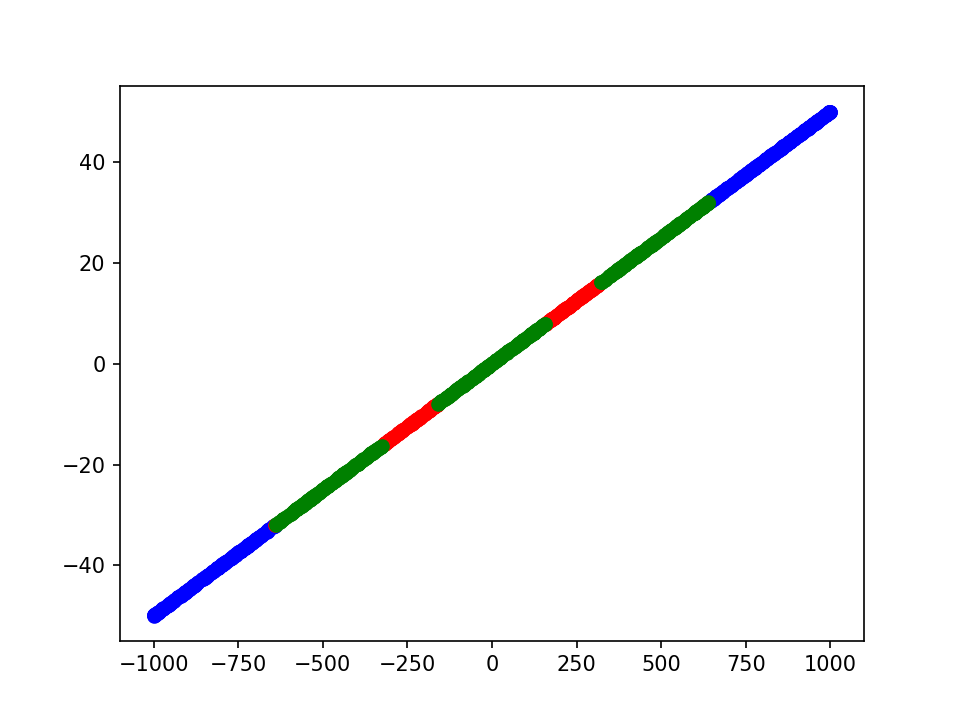

Left:  377
Right:  164
Collinear:  459


In [17]:
%matplotlib notebook
show(d,det_1)

<IPython.core.display.Javascript object>


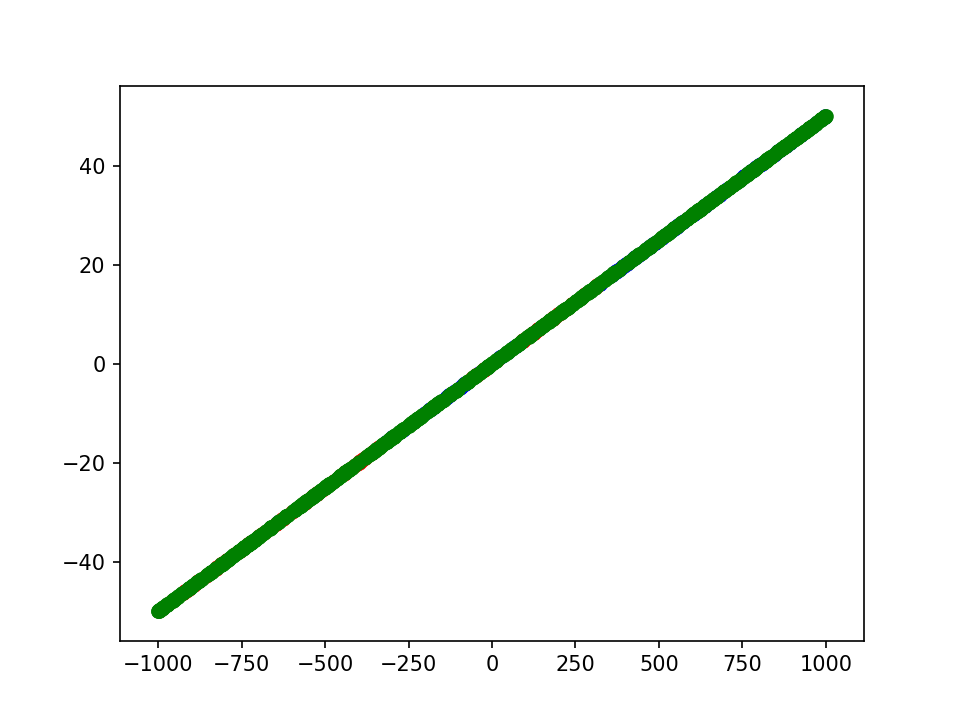

Left:  154
Right:  128
Collinear:  718


In [18]:
%matplotlib notebook
show(d,det_2)

<IPython.core.display.Javascript object>


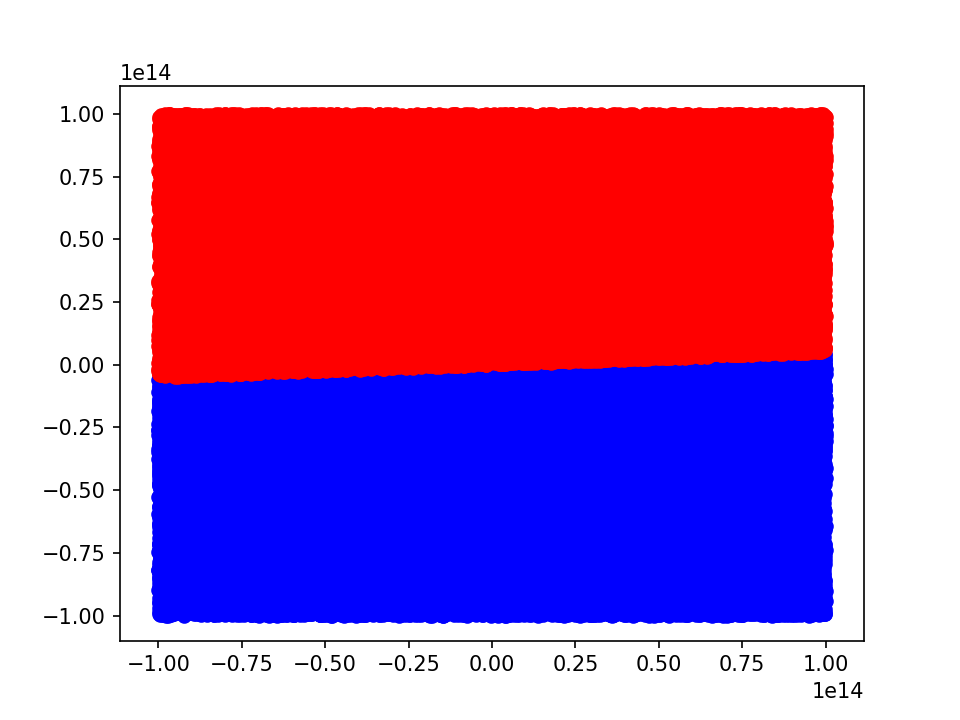

Left:  49718
Right:  50282
Collinear:  0


In [19]:
%matplotlib notebook
show(b,det_1, 0)

<IPython.core.display.Javascript object>


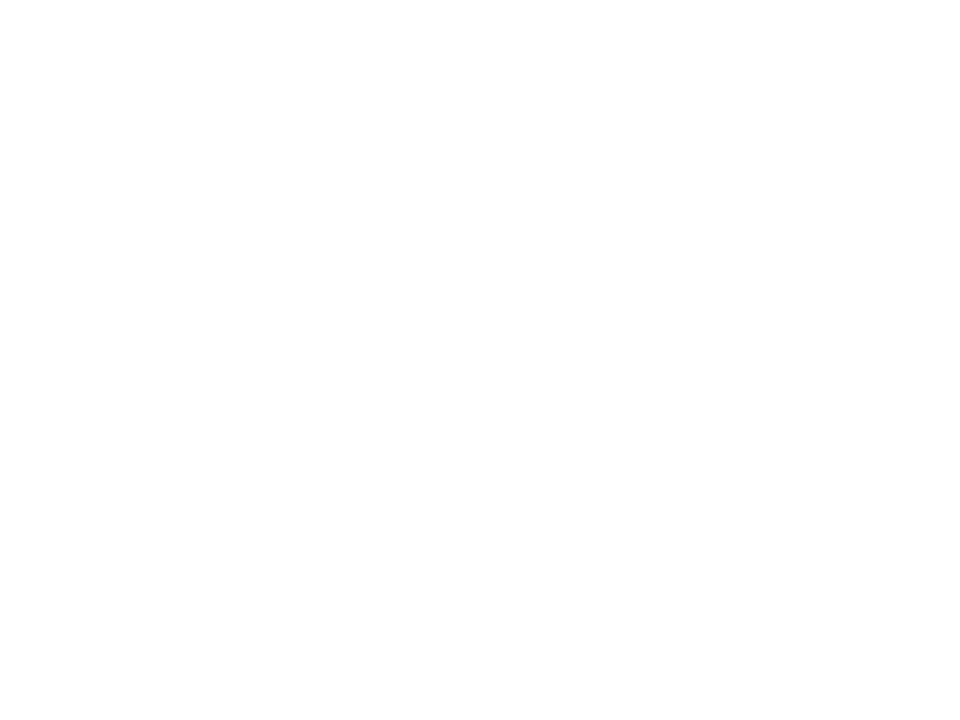

Left:  49714
Right:  50278
Collinear:  8


In [20]:
%matplotlib notebook
show(b,det_2, 0)

<IPython.core.display.Javascript object>


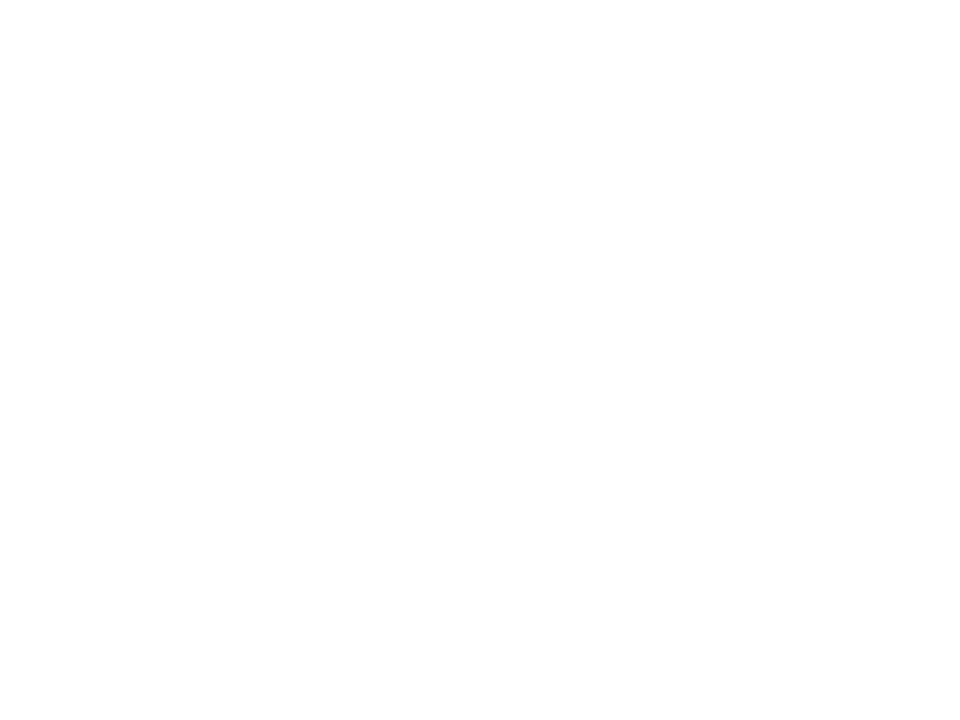

Left:  492
Right:  508
Collinear:  0


In [21]:
%matplotlib notebook
show(c,det_1, 0)

<IPython.core.display.Javascript object>


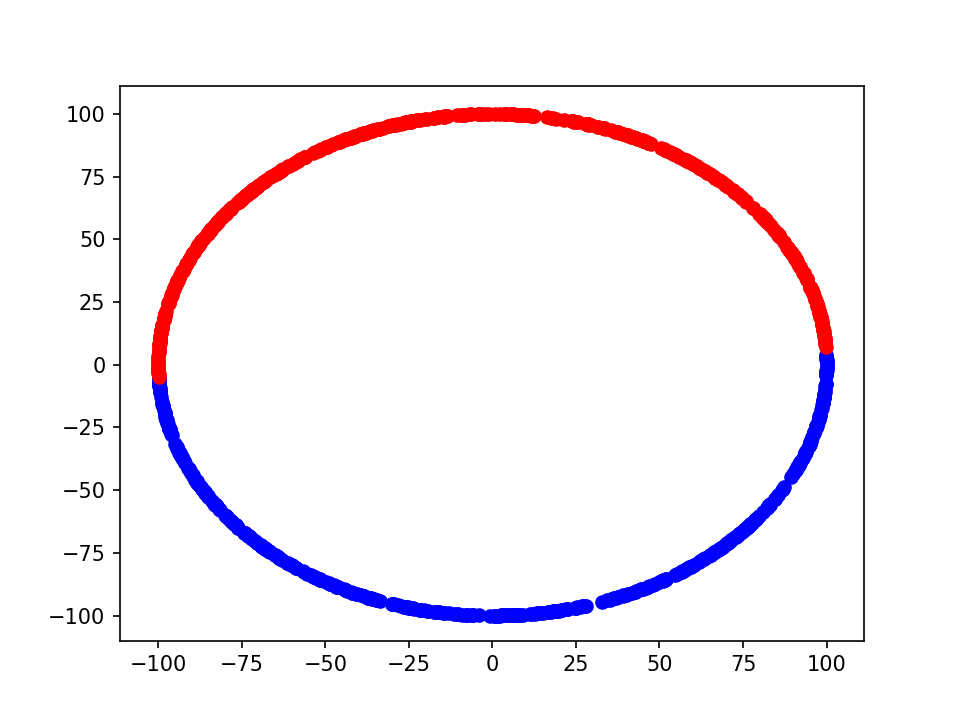

Left:  492
Right:  508
Collinear:  0


In [22]:
%matplotlib notebook
show(c,det_2, 0)

<IPython.core.display.Javascript object>


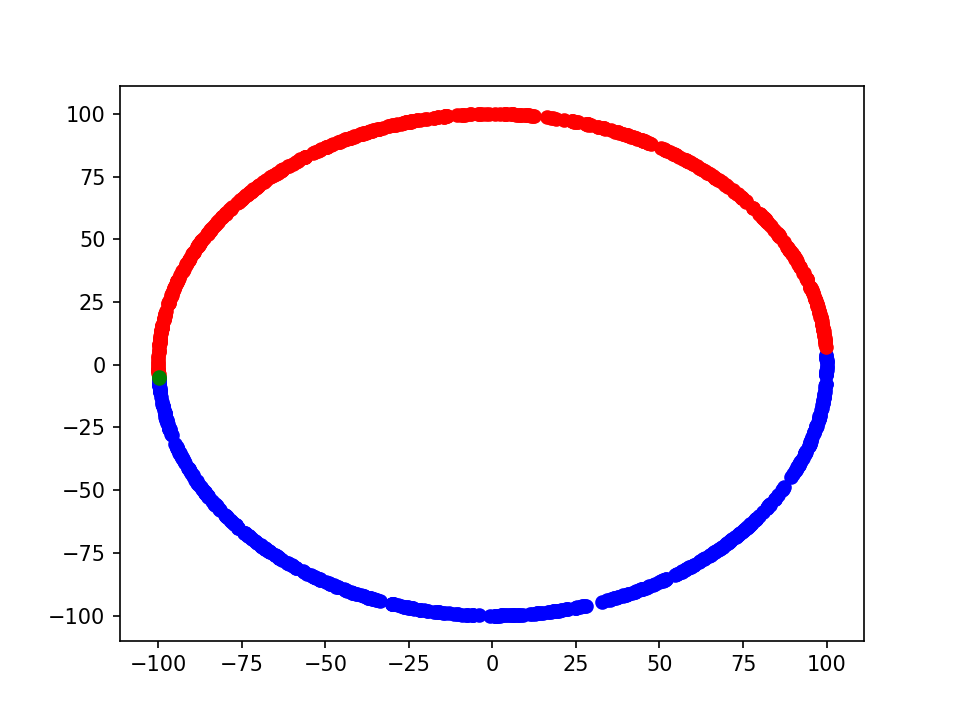

Left:  491
Right:  507
Collinear:  2


In [23]:
%matplotlib notebook
show(c,det_2, 1)

<IPython.core.display.Javascript object>


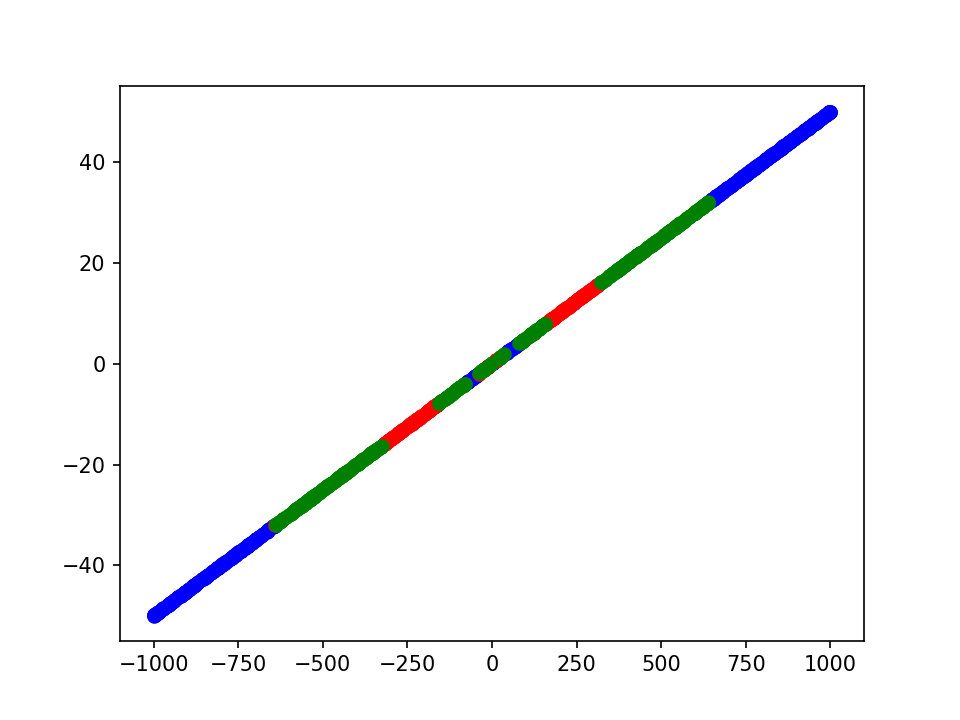

Left:  418
Right:  176
Collinear:  406


In [24]:
%matplotlib notebook
show(d,det_1, 0)

<IPython.core.display.Javascript object>


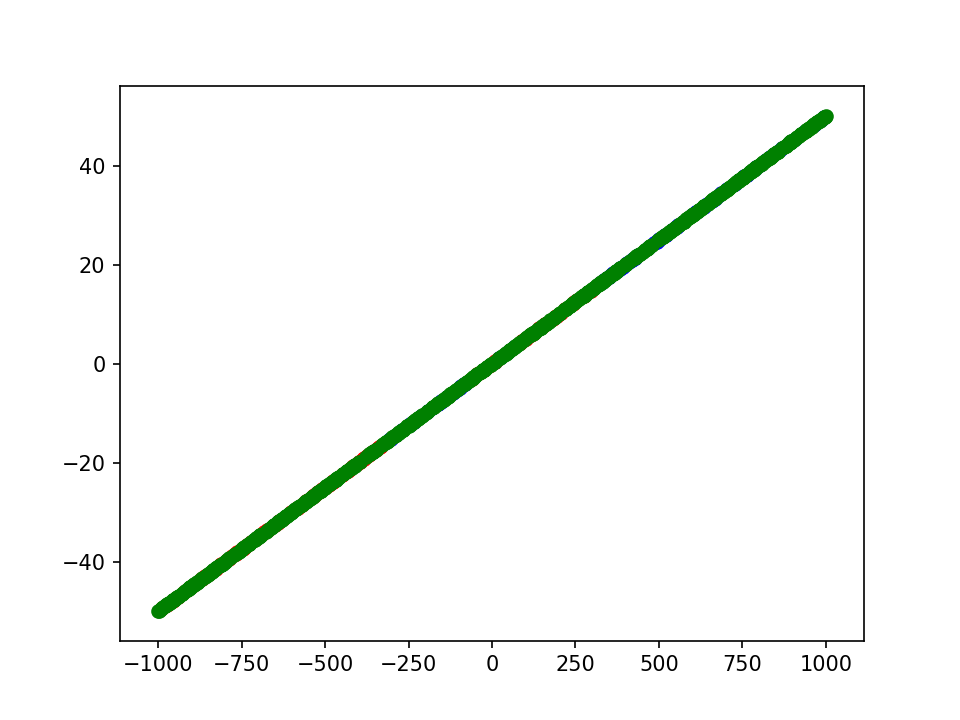

Left:  131
Right:  162
Collinear:  707


In [41]:
%matplotlib notebook
show(d,det_2, 0)